# Analysing evaluation results for composite reward with queue length

In [8]:
import os
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_rows", None)     # Show all rows
pd.set_option("display.max_colwidth", None) # Show full width of columns
pd.set_option("display.width", 1000)        # Set the total width of the terminal output

from data_analysis_functions import generate_summary_df_from_csv, get_df_from_csv, get_trained_and_fixed_from_csv # type: ignore

In [9]:
TRAINED_CHECKPOINT_PATHS = ["reward_experiments/2x2grid/combined_reward_with_queue_length/EVALUATION/PPO_2024-05-06_11_39__alpha_0.45",
                            "reward_experiments/2x2grid/combined_reward_with_queue_length/EVALUATION/PPO_2024-05-06_14_00__alpha_0.85",
                            "reward_experiments/2x2grid/combined_reward_with_queue_length/EVALUATION/PPO_2024-05-06_14_18__alpha_1", 
                            "reward_experiments/2x2grid/combined_reward_with_queue_length/EVALUATION/PPO_2024-05-06_18_40__alpha_0.75", 
                            "reward_experiments/2x2grid/combined_reward_with_queue_length/EVALUATION/PPO_2024-05-06_23_11__alpha_0.81"]
                            
TRAINED_CHECKPOINT_PATHS_ABS = [os.path.abspath(x) for x in TRAINED_CHECKPOINT_PATHS]

In [10]:
def concaten_summary_for_specific_seed(seed):
    '''
    Takes in a seed, and calls the generate summary dataframe. 
    '''
    fixed_tc_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[0], 
                                    eval_dir = "fixed_tc", 
                                    df_row_label = "fixed_tc",
                                    seed = seed)
    # trained_0_45_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[0], 
    #                                 eval_dir = "trained", 
    #                                 df_row_label = "alpha_0_45",
    #                                 seed = seed)
    trained_0_85_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[1], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_0_85",
                                    seed = seed)
    trained_1_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[2], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_1",
                                    seed = seed)
    trained_0_75_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[3], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_0_75",
                                seed = seed)
    trained_0_81_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[4], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_0_81",
                                seed = seed)
    alpha_experiment_df = pd.concat([fixed_tc_df, 
                                    # trained_0_45_df,
                                    trained_0_75_df,
                                    trained_0_81_df, 
                                    trained_0_85_df,
                                    trained_1_df], axis=0)

    return alpha_experiment_df

get dfs for all seeds, and concat

In [11]:
# alpha_experiment_df_39 = concaten_summary_for_specific_seed(39)
# alpha_experiment_df_49 = concaten_summary_for_specific_seed(49)
# alpha_experiment_df_83 = concaten_summary_for_specific_seed(83)
# alpha_experiment_df_51 = concaten_summary_for_specific_seed(51)
# alpha_experiment_df_74 = concaten_summary_for_specific_seed(74)
alpha_experiment_df_10 = concaten_summary_for_specific_seed(10)
# alpha_experiment_df_15 = concaten_summary_for_specific_seed(15)
# alpha_experiment_df_22 = concaten_summary_for_specific_seed(22)
# alpha_experiment_df_31 = concaten_summary_for_specific_seed(31)
# alpha_experiment_df_55 = concaten_summary_for_specific_seed(55)

SUMO_SEEDS = [10, 15, 22, 31, 55, 39, 83, 49, 51, 74]
SUMO_SEEDS = [10]
alpha_dfs = [concaten_summary_for_specific_seed(seed) for seed in SUMO_SEEDS]

# Step 2: Concatenate them along the row axis
alpha_df_combined = pd.concat(alpha_dfs, axis=0, ignore_index=False)

alpha_df_combined

,sys_abs_accel_episode_mean,sys_abs_accel_episode_rms,sys_abs_accel_episode_var,sys_abs_accel_episode_sum,sys_abs_accel_episode_integral,sys_abs_accel_episode_ms,sys_avg_speed_episode_mean,sys_avg_speed_episode_max,sys_avg_speed_episode_min,sys_avg_speed_episode_range,sys_avg_speed_episode_median,sys_avg_speed_episode_variance,sys_total_stopped_episode_mean,sys_avg_waiting_time_episode_mean,all_agents_abs_accel_episode_rms,all_agents_abs_accel_episode_mean,tot_agent_stopped_episode_mean,tot_agent_stopped_episode_sum,tot_agent_accum_wait_time
fixed_tc,17.799791,19.427774,60.617974,88998.956683,88978.900209,377.438422,6.265263,15.287334,0.272280,15.015054,6.576319,4.984019,11.6588,241.2870,14.415043,12.685126,11.6588,58294.0,277.5246
alpha_0_75,9.538395,11.066518,31.493135,47691.975470,47685.401142,122.467817,1.739442,15.287334,0.000000,15.287334,1.693671,1.055976,45.0026,79910.3986,9.209847,7.577371,45.0026,225013.0,33674.4248
alpha_0_81,10.238347,11.677630,31.549623,51191.732759,51188.251566,136.367053,4.498881,15.287334,1.304773,13.982561,4.458913,1.228155,18.9596,6962.6604,7.937763,6.528587,18.9596,94798.0,13494.5212
alpha_0_85,18.136874,19.604120,55.386397,90684.368018,90673.834140,384.321503,5.273331,15.287334,2.186924,13.100410,5.278079,1.252546,13.4492,232.4858,14.823204,13.242561,13.4492,67246.0,1313.5142
alpha_1,18.444420,19.684494,47.292130,92222.098861,92217.209336,387.479292,9.884229,15.287334,5.237088,10.050246,9.927898,1.628378,1.5824,7.0400,13.794833,12.531549,1.5824,7912.0,9.1056


In [12]:
# Step 3: Compute the mean for each row
df_average_whole_experiment = alpha_df_combined.groupby(alpha_df_combined.index).mean()
df_average_whole_experiment

,sys_abs_accel_episode_mean,sys_abs_accel_episode_rms,sys_abs_accel_episode_var,sys_abs_accel_episode_sum,sys_abs_accel_episode_integral,sys_abs_accel_episode_ms,sys_avg_speed_episode_mean,sys_avg_speed_episode_max,sys_avg_speed_episode_min,sys_avg_speed_episode_range,sys_avg_speed_episode_median,sys_avg_speed_episode_variance,sys_total_stopped_episode_mean,sys_avg_waiting_time_episode_mean,all_agents_abs_accel_episode_rms,all_agents_abs_accel_episode_mean,tot_agent_stopped_episode_mean,tot_agent_stopped_episode_sum,tot_agent_accum_wait_time
alpha_0_75,9.538395,11.066518,31.493135,47691.975470,47685.401142,122.467817,1.739442,15.287334,0.000000,15.287334,1.693671,1.055976,45.0026,79910.3986,9.209847,7.577371,45.0026,225013.0,33674.4248
alpha_0_81,10.238347,11.677630,31.549623,51191.732759,51188.251566,136.367053,4.498881,15.287334,1.304773,13.982561,4.458913,1.228155,18.9596,6962.6604,7.937763,6.528587,18.9596,94798.0,13494.5212
alpha_0_85,18.136874,19.604120,55.386397,90684.368018,90673.834140,384.321503,5.273331,15.287334,2.186924,13.100410,5.278079,1.252546,13.4492,232.4858,14.823204,13.242561,13.4492,67246.0,1313.5142
alpha_1,18.444420,19.684494,47.292130,92222.098861,92217.209336,387.479292,9.884229,15.287334,5.237088,10.050246,9.927898,1.628378,1.5824,7.0400,13.794833,12.531549,1.5824,7912.0,9.1056
fixed_tc,17.799791,19.427774,60.617974,88998.956683,88978.900209,377.438422,6.265263,15.287334,0.272280,15.015054,6.576319,4.984019,11.6588,241.2870,14.415043,12.685126,11.6588,58294.0,277.5246


## Columns of interest to compare across:

In [13]:
df_average_whole_experiment[['sys_abs_accel_episode_mean', 
                             'sys_abs_accel_episode_sum', 
                             "sys_abs_accel_episode_integral", 
                             'sys_avg_waiting_time_episode_mean',
                             "sys_total_stopped_episode_mean",
                             "tot_agent_stopped_episode_mean",
                             "tot_agent_stopped_episode_sum",
                             "tot_agent_accum_wait_time",
                             "all_agents_abs_accel_episode_mean"]]

,sys_abs_accel_episode_mean,sys_abs_accel_episode_sum,sys_abs_accel_episode_integral,sys_avg_waiting_time_episode_mean,sys_total_stopped_episode_mean,tot_agent_stopped_episode_mean,tot_agent_stopped_episode_sum,tot_agent_accum_wait_time,all_agents_abs_accel_episode_mean
alpha_0_75,9.538395,47691.975470,47685.401142,79910.3986,45.0026,45.0026,225013.0,33674.4248,7.577371
alpha_0_81,10.238347,51191.732759,51188.251566,6962.6604,18.9596,18.9596,94798.0,13494.5212,6.528587
alpha_0_85,18.136874,90684.368018,90673.834140,232.4858,13.4492,13.4492,67246.0,1313.5142,13.242561
alpha_1,18.444420,92222.098861,92217.209336,7.0400,1.5824,1.5824,7912.0,9.1056,12.531549
fixed_tc,17.799791,88998.956683,88978.900209,241.2870,11.6588,11.6588,58294.0,277.5246,12.685126


As you can see above, what we see is that -> 

In [7]:
df_average_subset_experiment = df_average_whole_experiment.loc[['alpha_0', "alpha_0_2", "alpha_0_25", "alpha_0_25_reduced_obs", "alpha_0_5", "fixed_tc"]]

df_average_subset_experiment

KeyError: "['alpha_0', 'alpha_0_2', 'alpha_0_25', 'alpha_0_25_reduced_obs', 'alpha_0_5'] not in index"

## Difference between trained and fixed_tc eval for alpha = 0.25, seed 39

In [ ]:
fixed_39 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], "fixed_tc", seed = 39)
trained_39_alpha_0_25 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[1], "trained", seed = 39)
trained_39_alpha_0_25 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[6], "trained", seed = 39)

In [ ]:
diff = np.square(trained_39_alpha_0_25['system_abs_accel'] - fixed_39['system_abs_accel'])

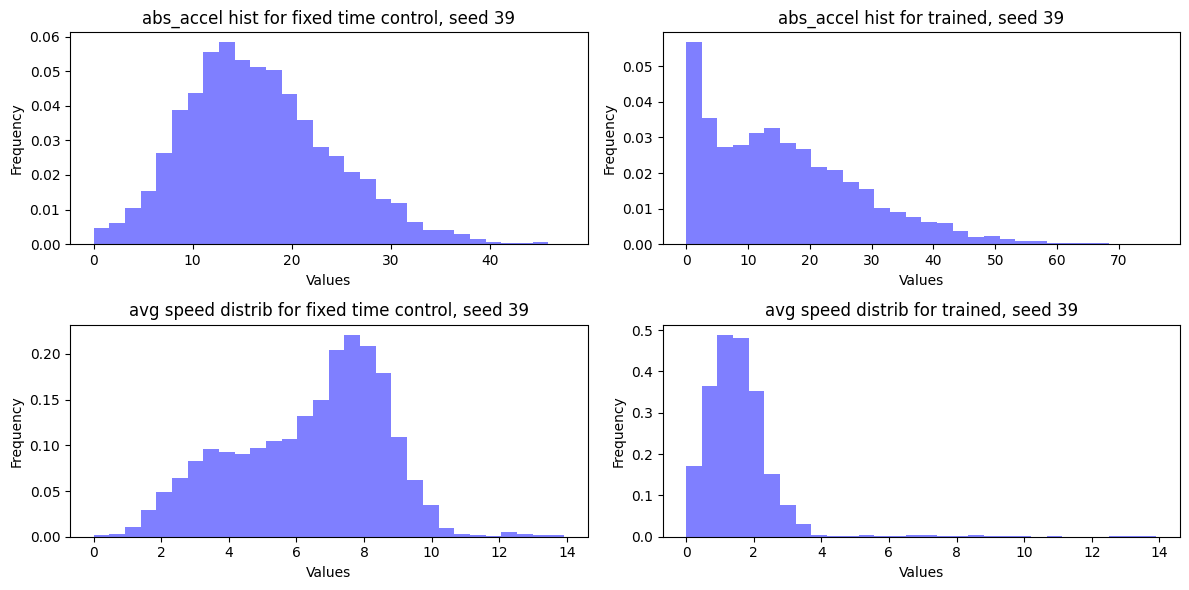

In [ ]:
import matplotlib.pyplot as plt

fixed_39_abs_acc = fixed_39['system_abs_accel']
trained_39_abs_acc = trained_39_alpha_0_25['system_abs_accel']

fixed_39_speeds = fixed_39['sys_avg_speed']
trained_39_speeds = trained_39_alpha_0_25['sys_avg_speed']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

# Plot on first subplot
axes[0,0].hist(fixed_39_abs_acc, bins=30, density=True, alpha=0.5, color='blue')
axes[0,0].set_title('abs_accel hist for fixed time control, seed 39')
axes[0,0].set_xlabel('Values')
axes[0,0].set_ylabel('Frequency')

# Plot on second subplot
axes[0,1].hist(trained_39_abs_acc, bins=30, density=True, alpha=0.5, color='blue')
axes[0,1].set_title('abs_accel hist for trained, seed 39')
axes[0,1].set_xlabel('Values')
axes[0,1].set_ylabel('Frequency')

# Plot on first subplot
axes[1,0].hist(fixed_39_speeds, bins=30, density=True, alpha=0.5, color='blue')
axes[1,0].set_title('avg speed distrib for fixed time control, seed 39')
axes[1,0].set_xlabel('Values')
axes[1,0].set_ylabel('Frequency')

# Plot on second subplot
axes[1,1].hist(trained_39_speeds, bins=30, density=True, alpha=0.5, color='blue')
axes[1,1].set_title('avg speed distrib for trained, seed 39')
axes[1,1].set_xlabel('Values')
axes[1,1].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import scipy.stats as stats

# Perform the two-sample K-S test
stat, p = stats.ks_2samp(trained_39_alpha_0_25['system_abs_accel'], fixed_39['system_abs_accel'])

print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('The two datasets are from the same distribution (fail to reject H0).')
else:
    print('The two datasets are from different distributions (reject H0).')

Statistics=0.214, p=0.000
The two datasets are from different distributions (reject H0).


## Analyse the evaluation metrics 
look at the reward components, such as difference in waiting times + abs accelerations 

In [ ]:
from data_analysis_functions import get_df_from_csv_name
eval_metrics_fixed_df = get_df_from_csv_name(TRAINED_CHECKPOINT_PATHS_ABS[0], "fixed_tc", "SEED_10_nw_metrics")
eval_metrics_untrained_df = get_df_from_csv_name(TRAINED_CHECKPOINT_PATHS_ABS[1], "untrained", "SEED_10_nw_metrics")
eval_metrics_trained_df = get_df_from_csv_name(TRAINED_CHECKPOINT_PATHS_ABS[1], "trained", "SEED_10_nw_metrics")

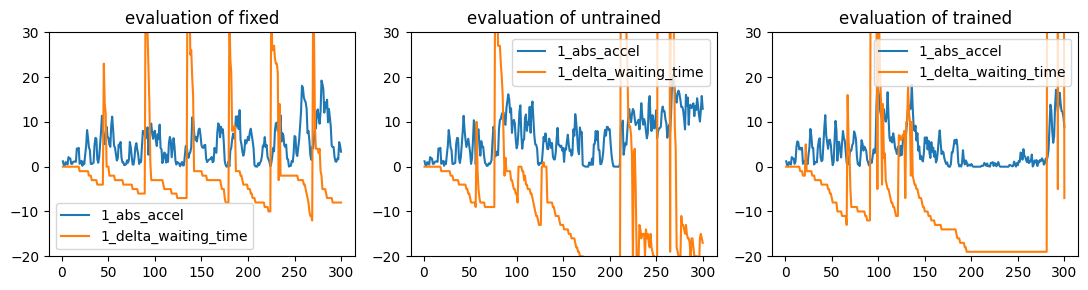

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(11, 3))  # 3 plots in one row
plt.rcParams['figure.dpi'] = 100  # Adjust this for higher quality output

# sum up the agent specific metrics
eval_metrics_fixed_df.loc[1:300, ['1_abs_accel', '1_delta_waiting_time']].plot(
    title="evaluation of fixed", 
    ylim=(-20,30), 
    ax=axs[0])
eval_metrics_untrained_df.loc[1:300, ['1_abs_accel', '1_delta_waiting_time']].plot(
    title="evaluation of untrained",
    ylim=(-20,30),
    ax=axs[1])
eval_metrics_trained_df.loc[1:300, ['1_abs_accel', '1_delta_waiting_time']].plot(
    title="evaluation of trained", 
    ylim=(-20,30),
    ax=axs[2])

plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # 3 plots in one row
